In [1]:
load('definitions.sage')

Below, we call the file 'triples_below_1018.csv,' which contains all abc triples $(a,b,c)$ found by the ABC@Home Project with $c<10^{18}$. In particular, this csv file has $14\ 482\ 065$ entries.

In [2]:
from sage.schemes.elliptic_curves.weierstrass_morphism import *
import csv
file = open("triples_below_1018.csv")
data = list(csv.reader(file,
 delimiter=" "))
file.close()

Next, we construct the set $S$, which consists of all $abc$ triples of the form $(1,c-1,c)$ with $c<10^{18}$. The code also verifies that the cardinality of S is $45\ 603$.

In [3]:
S=[]
for i in (0..14482064):
	a=ZZ(data[i][1])
	c=ZZ(data[i][0])
	b=ZZ(c-a)
	if a==1 or b==1:
		S.append((a,b,c))
reset('data')
print(Set(S).cardinality())

45603


Below, we construct the set
$$ T=\left\{  \left(  1,c-1,c\right)  \in S\mid c=n^{l}\text{ or }c=n^{l}+1\text{for some }l>1\right\},$$
and verify that it has $8\ 413$ elements.

In [4]:
T=[]
for x in S:
	lc=GCDs(vps(ZZ(x[2])))
	lb=GCDs(vps(ZZ(x[1])))
	if lc>1:
		T.append(x)
	if lb>1:
		T.append(x)
print(Set(T).cardinality())

8413


Now let
$$C_{i}=\left\{  \left(  1,c-1,c\right)  \in T\mid\left(  1,c-1,c\right)  \text{arises from Corollary 3.i}\right\}. $$
Below, Ci corresponds to the set $C_i$. We note that the code for constructing Ci is found in the construction_for_C.sage file. The code below prints the cardinality of $C_i$, as well as the cardinality of the set
$$ C=\bigcup_{3\leq i\leq11}C_{i}.$$

In [5]:
load('construction_of_C.sage')
print(Set(C3).cardinality())
print(Set(C4).cardinality())
print(Set(C5).cardinality())
print(Set(C6).cardinality())
print(Set(C7).cardinality())
print(Set(C8).cardinality())
print(Set(C9).cardinality())
print(Set(C10).cardinality())
print(Set(C11).cardinality())
C=Set(C11).union(Set(Set(C10).union(Set(Set(C9).union(Set(Set(C8).union(Set(Set(C7).union(Set(Set(C6).union(Set(Set(C5).union(Set(Set(C4).union(Set(C3))))))))))))))))
print(Set(C).cardinality())

32
58
12
41
29
81
46
18
36
162


Let $D$ denote the set of $abc$ triples in $T$ with the property that an element of $D$ is in $C$ or can be obtained from an $abc$ triple in $C$ after successive applications of Proposition 4.1. The imported code constructs D through repeated applications of Proposition 4.1 and Corollary 2.4. In particular, the code constructs a sequence of subsets $D_i$ with the property that $C \subseteq D_i \subseteq D_j$ for $i \leq j$. In particular, we set $D=D_8$ since the code below shows that the cardinality of $D_i$ has stabilized by $D_8$. In particular, we see that the cardinality of $D$ is $309$.

In [6]:
load('construction_of_D.sage')
print(Set(D1).cardinality())
print(Set(D2).cardinality())
print(Set(D3).cardinality())
print(Set(D4).cardinality())
print(Set(D5).cardinality())
print(Set(D6).cardinality())
print(Set(D7).cardinality())
print(Set(D8).cardinality())
D=sorted(Set(D8))
print(Set(D).cardinality())

217
285
303
307
309
309
309
309
309


For sets $X$ and $Y$ such that $X\subseteq Y\subseteq S$, we define
$$\delta_{X,Y}\!\left(  x\right)  =\frac{\#\left\{  \left(  1,c-1,c\right)  \in X\mid c\leq x\right\}  }{\#\left\{  \left(  1,c-1,c\right)  \in Y\mid c\leq x\right\}  }.$$
Below, we refer to $\delta_{X,Y}\!\left(  x\right)$  as den(X,Y,n). We note that this function gives the percentage of $abc$ triples $(1,c-1,c)$ of $Y$ that are in $X$ with $c\leq n$.  The code below gives some values of $\delta_{T,S}\!\left(  x\right)  ,\delta
_{D,S}\!\left(  x\right)  $, and $\delta_{D,T}\!\left(  x\right)  $:

In [7]:
print((den(T,S,10^4),den(D,S,10^4), den(D,T,10^4)))
print((den(T,S,10^6),den(D,S,10^6), den(D,T,10^6)))
print((den(T,S,10^8),den(D,S,10^8), den(D,T,10^8)))
print((den(T,S,10^10),den(D,S,10^10), den(D,T,10^10)))
print((den(T,S,10^12),den(D,S,10^12), den(D,T,10^12)))
print((den(T,S,10^14),den(D,S,10^14), den(D,T,10^14)))
print((den(T,S,10^16),den(D,S,10^16), den(D,T,10^16)))
print((den(T,S,10^18),den(D,S,10^18), den(D,T,10^18)))

(80.0, 53.3, 66.7)
(57.8, 28.1, 48.7)


(45.2, 13.5, 29.9)
(35.1, 7.03, 20.0)


(30.0, 3.79, 12.6)
(24.6, 2.06, 8.40)


(20.9, 1.14, 5.44)


(18.4, 0.678, 3.67)


In [8]:
W1=[]
W2=[]
for x in T:
	lc=GCDs(vps(ZZ(x[2])))
	lb=GCDs(vps(ZZ(x[1])))
	if lc>1:
		Qx=[]
		Q1=divisors(prodcosocle(x[1]))
		for y in Q1:
			if cosocle(y) > radical(ZZ(x[2]^(1/lc))):
				Qx.append(y)
				W1.append((x[0],x[1],x[2],ZZ(x[2]^(1/lc)),lc, min(Qx), numerical_approx(Quality(x[0],x[1]),digits=5), min(Qx) == x[1]))
	if lb>1 and is_odd(lb):
		Qx=[]
		Q1=divisors(prodcosocle(x[2]))
		for y in Q1:
			if cosocle(y) > radical(ZZ(x[1]^(1/lb))):
				Qx.append(y)
				W2.append((x[0],x[1],x[2],ZZ(x[1]^(1/lb)),lb, min(Qx),numerical_approx(Quality(x[0],x[1]),digits=5),min(Qx) == x[2]))
W1=sorted(Set(W1))
W2=sorted(Set(W2))

In [9]:
import csv
import sys

f = open('triples_for_thm1.csv', 'wt')
try:
    writer = csv.writer(f)
    writer.writerow( ( 'a', 'b', 'c', 'n', 'l', 'm', 'quality', 'm is not a proper divisor of b'
                     ))
    for u in (0..Set(W1).cardinality()-1):
        writer.writerow( ( W1[u][0], W1[u][1],W1[u][2],W1[u][3],W1[u][4],W1[u][5],W1[u][6],W1[u][7]


                         ))
finally:
    f.close()

print(open('triples_for_thm1.csv', 'rt'))

import csv
import sys

f = open('triples_for_thm2.csv', 'wt')
try:
    writer = csv.writer(f)
    writer.writerow( ( 'a', 'b', 'c', 'n', 'l', 'm', 'quality', 'm is not a proper divisor of b'
                     ))
    for u in (0..Set(W2).cardinality()-1):
        writer.writerow( ( W2[u][0], W2[u][1],W2[u][2],W2[u][3],W2[u][4],W2[u][5],W2[u][6],W2[u][7]


                         ))
finally:
    f.close()

print(open('triples_for_thm2.csv', 'rt'))

<_io.TextIOWrapper name='triples_for_thm1.csv' mode='rt' encoding='UTF-8'>
<_io.TextIOWrapper name='triples_for_thm2.csv' mode='rt' encoding='UTF-8'>


In [10]:
import csv
import sys

f = open('qualities_in_S.csv', 'wt')
try:
    writer = csv.writer(f)
    writer.writerow( ( 'Quality' , ' '
                     ))
    for u in (0..Set(S).cardinality()-1):
        writer.writerow( ( Quality(S[u][0] , S[u][1]), 


                         ))
finally:
    f.close()

print(open('qualities_in_S.csv', 'rt'))

<_io.TextIOWrapper name='qualities_in_S.csv' mode='rt' encoding='UTF-8'>


In [11]:
import csv
import sys

f = open('qualities_in_T.csv', 'wt')
try:
    writer = csv.writer(f)
    writer.writerow( ( 'Quality' , ' '
                     ))
    for u in (0..Set(T).cardinality()-1):
        writer.writerow( ( Quality(T[u][0] , T[u][1]), 


                         ))
finally:
    f.close()

print(open('qualities_in_T.csv', 'rt'))

<_io.TextIOWrapper name='qualities_in_T.csv' mode='rt' encoding='UTF-8'>


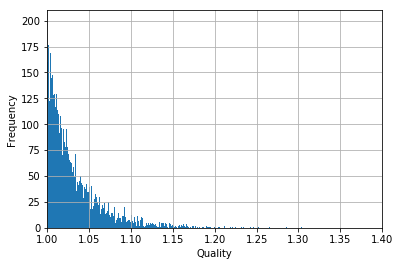

<Figure size 1440x720 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('qualities_in_S.csv')
data = df['Quality']
data.hist(bins=5000)
plt.xlim([1.0,1.4])
plt.title("")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.figure(figsize=(20,10))
plt.show()

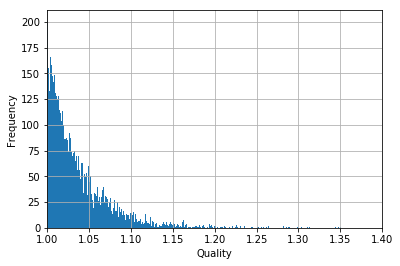

<Figure size 1440x720 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('qualities_in_T.csv')
data = df['Quality']
data.hist(bins=609)
plt.xlim([1.0,1.4])
plt.title("")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.figure(figsize=(20,10))
plt.show()